In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import numpy as np

In [3]:
sns.set(style="whitegrid")
data = pd.read_csv('co-emissions-per-capita.csv')
data.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [4]:
countries = ['United States', 'China', 'India', 'United Kingdom', 'Mexico', 'Peru', 'Colombia']
filtered_data = data[data['Entity'].isin(countries)].copy()
filtered_data.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
5226,China,CHN,1907,0.048403
5227,China,CHN,1908,0.055021
5228,China,CHN,1909,0.058310
5229,China,CHN,1910,0.059680
5230,China,CHN,1911,0.058271


In [5]:
print(f"Años disponibles: {filtered_data['Year'].min()} - {filtered_data['Year'].max()}")

Años disponibles: 1750 - 2022


In [6]:
print("Valores nulos por columna:")
print(filtered_data.isnull().sum())

Valores nulos por columna:
Entity                               0
Code                                 0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


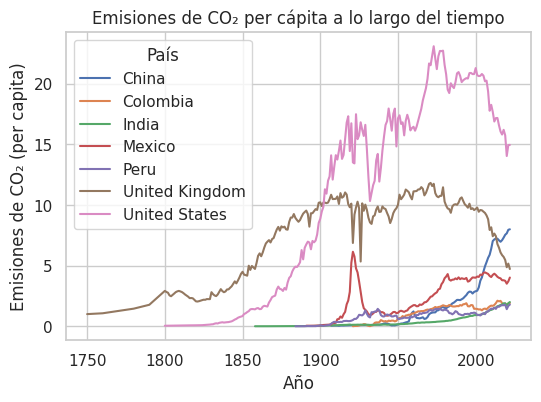

In [9]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=filtered_data, x='Year', y='Annual CO₂ emissions (per capita)', hue='Entity')
plt.title("Emisiones de CO₂ per cápita a lo largo del tiempo")
plt.xlabel("Año")
plt.ylabel("Emisiones de CO₂ (per capita)")
plt.legend(title='País')
plt.show()

In [15]:
filtered_data.loc[:, 'Decade'] = (filtered_data['Year'] // 10) * 10
decade_data = filtered_data[filtered_data['Decade'] >= 1950]
decade_avg = decade_data.groupby(['Entity', 'Decade'])['Annual CO₂ emissions (per capita)'].mean().reset_index()


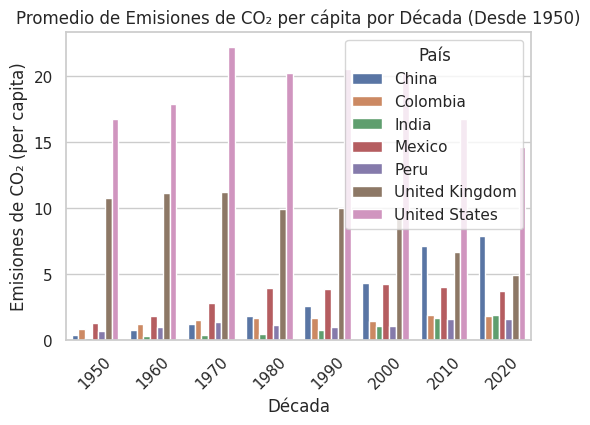

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(data=decade_avg, x='Decade', y='Annual CO₂ emissions (per capita)', hue='Entity')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X
plt.title("Promedio de Emisiones de CO₂ per cápita por Década (Desde 1950)")
plt.xlabel("Década")
plt.ylabel("Emisiones de CO₂ (per capita)")
plt.legend(title='País')
plt.show()

In [18]:
decades_1950_2020 = filtered_data[filtered_data['Decade'].isin([1950, 2020])].copy()
decades_1950_2020.loc[:, 'Decade Label'] = decades_1950_2020['Decade'].astype(str)
decades_1950_2020.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita),Decade,Decade Label
5269,China,CHN,1950,0.144923,1950,1950
5270,China,CHN,1951,0.184452,1950,1950
5271,China,CHN,1952,0.226566,1950,1950
5272,China,CHN,1953,0.231707,1950,1950
5273,China,CHN,1954,0.272703,1950,1950


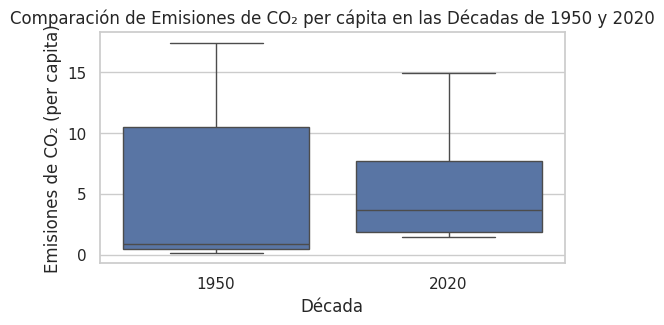

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=decades_1950_2020, x='Decade Label', y='Annual CO₂ emissions (per capita)')
plt.title("Comparación de Emisiones de CO₂ per cápita en las Décadas de 1950 y 2020")
plt.xlabel("Década")
plt.ylabel("Emisiones de CO₂ (per capita)")
plt.show()

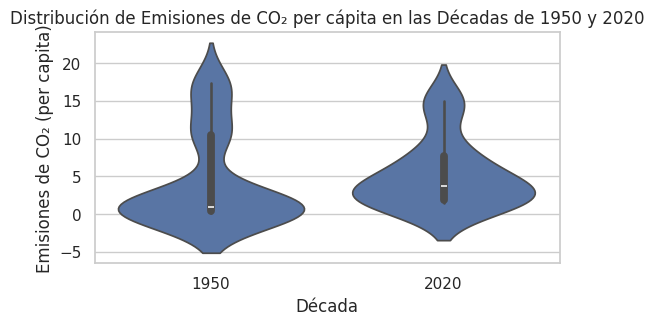

In [20]:
plt.figure(figsize=(6, 3))
sns.violinplot(data=decades_1950_2020, x='Decade Label', y='Annual CO₂ emissions (per capita)')
plt.title("Distribución de Emisiones de CO₂ per cápita en las Décadas de 1950 y 2020")
plt.xlabel("Década")
plt.ylabel("Emisiones de CO₂ (per capita)")
plt.show()

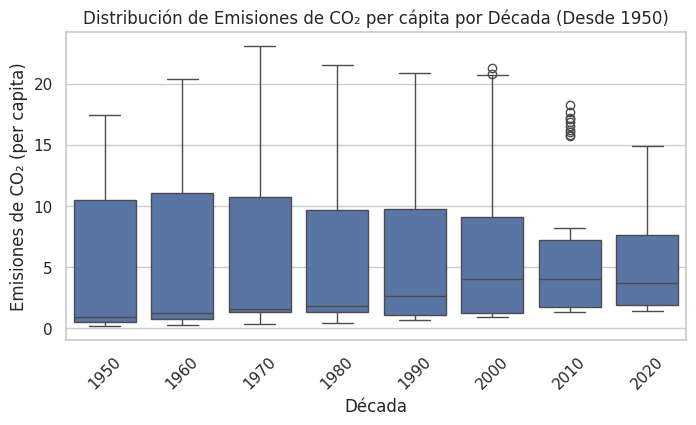

In [21]:
all_decades_data = filtered_data[filtered_data['Decade'] >= 1950]
plt.figure(figsize=(8, 4))
sns.boxplot(data=all_decades_data, x='Decade', y='Annual CO₂ emissions (per capita)')
plt.title("Distribución de Emisiones de CO₂ per cápita por Década (Desde 1950)")
plt.xlabel("Década")
plt.ylabel("Emisiones de CO₂ (per capita)")
plt.xticks(rotation=45)
plt.show()

In [22]:
pivot_data = filtered_data.pivot(index='Year', columns='Entity', values='Annual CO₂ emissions (per capita)')
pivot_data.head()

Entity,China,Colombia,India,Mexico,Peru,United Kingdom,United States
Year,,,,,,,
1750,NaN,NaN,NaN,NaN,NaN,1.001912,NaN
1760,NaN,NaN,NaN,NaN,NaN,1.070361,NaN
1770,NaN,NaN,NaN,NaN,NaN,1.262798,NaN
1780,NaN,NaN,NaN,NaN,NaN,1.452040,NaN
1790,NaN,NaN,NaN,NaN,NaN,1.770786,NaN


In [23]:
correlation_matrix = pivot_data.corr()

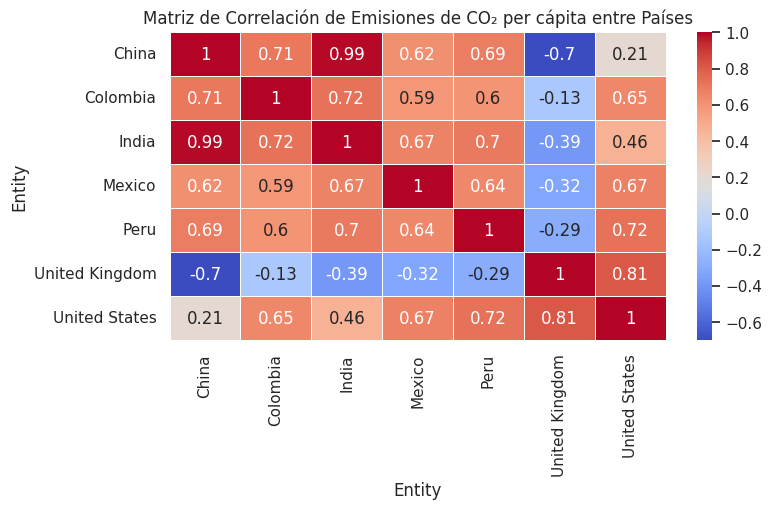

In [24]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación de Emisiones de CO₂ per cápita entre Países")
plt.show()

In [25]:
def scatter_plot_dynamic(country1, country2, trendline=False):
    if country1 == country2:
        print("Seleccione dos países diferentes para comparar.")
        return
    
    # Filtrar datos para los dos países seleccionados
    data1 = filtered_data[filtered_data['Entity'] == country1]
    data2 = filtered_data[filtered_data['Entity'] == country2]
    
    # Combinar datos en un solo DataFrame por año
    merged_data = data1[['Year', 'Annual CO₂ emissions (per capita)']].merge(
        data2[['Year', 'Annual CO₂ emissions (per capita)']],
        on='Year', suffixes=(f'_{country1}', f'_{country2}')
    )
    
    # Calcular el coeficiente de correlación
    correlation = merged_data[f'Annual CO₂ emissions (per capita)_{country1}'].corr(
        merged_data[f'Annual CO₂ emissions (per capita)_{country2}']
    )

    # Graficar el diagrama de dispersión
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=merged_data, 
                    x=f'Annual CO₂ emissions (per capita)_{country1}', 
                    y=f'Annual CO₂ emissions (per capita)_{country2}')
    
    plt.title(f"Relación entre Emisiones de CO₂ per cápita de {country1} y {country2}\nCoeficiente de Correlación: {correlation:.2f}")
    plt.xlabel(f"Emisiones de CO₂ per cápita - {country1}")
    plt.ylabel(f"Emisiones de CO₂ per cápita - {country2}")

    # Agregar línea de tendencia si se selecciona
    if trendline:
        # Calcular la línea de tendencia
        x = merged_data[f'Annual CO₂ emissions (per capita)_{country1}']
        y = merged_data[f'Annual CO₂ emissions (per capita)_{country2}']
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m * x + b, color="red", linestyle="--", label=f"Tendencia (y = {m:.2f}x + {b:.2f})")
        plt.legend()

    plt.show()


In [26]:
# Crear un widget interactivo para seleccionar los países y la opción de línea de tendencia
interact(scatter_plot_dynamic, 
         country1=widgets.Dropdown(options=countries, description='País 1', value='United States'),
         country2=widgets.Dropdown(options=countries, description='País 2', value='China'),
         trendline=widgets.Checkbox(value=False, description='Mostrar línea de tendencia'))

interactive(children=(Dropdown(description='País 1', options=('United States', 'China', 'India', 'United Kingd…

<function __main__.scatter_plot_dynamic(country1, country2, trendline=False)>